## Example Analysis of an extended supernova remnant W51C (4FGL J1923.2+1408e)

We are performing a [binned likelihood analysis](https://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/binned_likelihood_tutorial.html) with Fermipy using ~1-year of LAT data. 

To run this notebook with precomputed files, you should have the following files already in your home directory:
* ``EV0*.fits where * is 0,1,2,3``
* ``events.txt``
* ``SC00.fits``

and your working directory (``./data``):
* ``ltcube_0*.fits for 0,1,2,3``
* ``srcmdl_0*.xml for 0,1,2,3``
* ``srcmap_0*.fits for 0,1,2,3``

Verify the files exist:

In [48]:
ls ./

 config.yaml   EV02.fits                        lat_server_params.png
 data/         EV03.fits                        SC00.fits
 EV00.fits     events.txt                       Simple_Extension_Analysis.ipynb
 EV01.fits    'Extended Source Fitting.ipynb'   W51C.png


In [49]:
ls data/

baseline_model_00.xml
baseline_model_01.xml
baseline_model_02.xml
baseline_model_03.xml
baseline_model_counts_map_2.000_4.699.png
baseline_model_counts_map_xproj_2.000_4.699.png
baseline_model_counts_map_yproj_2.000_4.699.png
baseline_model_counts_spectrum.png
baseline_model.fits
baseline_model_model_map_2.000_4.699.png
baseline_model.npy
bexpmap_00.fits
bexpmap_01.fits
bexpmap_02.fits
bexpmap_03.fits
bexpmap_roi_00.fits
bexpmap_roi_01.fits
bexpmap_roi_02.fits
bexpmap_roi_03.fits
ccube_00.fits
ccube_01.fits
ccube_02.fits
ccube_03.fits
ccube.fits
evfile_00.txt
evfile_01.txt
evfile_02.txt
evfile_03.txt
fermipy.log
ft1_00.fits
ft1_01.fits
ft1_02.fits
ft1_03.fits
global_model_pointsource_powerlaw_2.00_tsmap.fits
global_model_pointsource_powerlaw_2.00_tsmap.npy
gtbin.par
gtexpcube2.par
gtltcube.par
gtmktime.par
gtselect.par
gtsrcmaps.par
ltcube_00.fits
ltcube_01.fits
ltcube_02.fits
ltcube_03.fits
no_snr_baseline_model_00.xml
no_snr_baseline_model_01.xml
no_snr_baseline_model_02.xml
no_snr_b

## Import necessary packages including FermiPy

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from fermipy.gtanalysis import GTAnalysis

## Make the configuration file to initiate Fermi-LAT data setup.

Our file is called ```config.yaml``` and it will read like this:

```
data:
 evfile : events.txt
 scfile : SC00.fits

binning:
 roiwidth   : 10.0
 binsz      : 0.1
 binsperdec : 8

selection:
 emin    : 100
 emax    : 50e3
 zmax    : 90
 evclass : 128
 tmin    : 239557417
 tmax    : 269222402
 filter  : 'DATA_QUAL>0 && LAT_CONFIG==1'
 ra      : 290.83
 dec     : 14.1558

gtlike:
 edisp : True
 irfs  : 'P8R3_SOURCE_V3'
 edisp_disable  : ['isodiff', 'galdiff']

model:
 src_roiwidth : 15.0
 galdiff  : '$CONDA_PREFIX/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits'
 isodiff  : 'iso_P8R3_SOURCE_V3_v1.txt'
 extdir   : '$CONDA_PREFIX/LAT_extended_sources_12years/Templates'
 catalogs : '4FGL-DR3'

components:
  - { selection : { evtype : 4  } } # PSF0
  - { selection : { evtype : 8  } } # PSF1
  - { selection : { evtype : 16 } } # PSF2
  - { selection : { evtype : 32 } } # PSF3

fileio:
   outdir : data
```

In [51]:
config = open('config.yaml',"w")
config.close()
config = open('config.yaml',"a")
config.write("data:\n evfile : events.txt\n scfile : SC00.fits\n\n")
config.write("binning:\n roiwidth   : 10.0\n binsz      : 0.1\n binsperdec : 8\n\n") 
config.write("selection:\n emin    : 100\n emax    : 50e3\n zmax    : 90\n evclass : 128\n tmin    : 239557417\n tmax    : 269222402\n filter  : 'DATA_QUAL>0 && LAT_CONFIG==1'\n ra      : 290.83\n dec     : 14.1558 \n\n" )
config.write("gtlike:\n edisp : True\n irfs  : 'P8R3_SOURCE_V3'\n edisp_disable  : ['isodiff', 'galdiff']\n\n")
config.write("model:\n src_roiwidth : 15.0\n galdiff  : '$CONDA_PREFIX/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits'\n isodiff  : 'iso_P8R3_SOURCE_V3_v1.txt'\n extdir   : '$CONDA_PREFIX/LAT_extended_sources_12years/Templates'\n catalogs : '4FGL-DR3'\n\n")
config.write("components:\n - { selection : { evtype : 4 } } # PSF0\n - { selection : { evtype : 8 } } # PSF1\n - { selection : { evtype : 16 } } # PSF2\n - { selection : { evtype : 32 } } # PSF3\n\n")
config.write("fileio: \n outdir : data\n\n\n")
config.close()

## Setup the object and load in the config file
We are reading in the configuration file here and configuring the analysis

In [52]:
gta = GTAnalysis('config.yaml',logging={'verbosity' : 3})

2024-05-31 19:18:29 INFO    GTAnalysis.__init__(): 
--------------------------------------------------------------------------------
fermipy version 1.2.0 
ScienceTools version 2.2.11


In [53]:
gta.setup()

2024-05-31 19:18:31 INFO    GTAnalysis.setup(): Running setup.
2024-05-31 19:18:31 INFO    GTBinnedAnalysis.setup(): Running setup for component 00
2024-05-31 19:18:31 INFO    GTBinnedAnalysis._select_data(): Skipping data selection.
2024-05-31 19:18:31 INFO    GTBinnedAnalysis._create_ltcube(): Skipping LT Cube.
2024-05-31 19:18:31 INFO    GTBinnedAnalysis._create_expcube(): Skipping gtexpcube.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-OBS to 54682.655283 from DATE-OBS.
Set MJD-END to 55026.000000 from DATE-END'. [astropy.wcs.wcs]
2024-05-31 19:18:31 INFO    GTBinnedAnalysis._create_srcmaps(): Skipping gtsrcmaps.
2024-05-31 19:18:31 INFO    GTBinnedAnalysis.setup(): Finished setup for component 00
2024-05-31 19:18:31 INFO    GTBinnedAnalysis.setup(): Running setup for component 01
2024-05-31 19:18:31 INFO    GTBinnedAnalysis._select_data(): Skipping data selection.
2024-05-31 19:18:31 INFO    GTBinnedAnalysis._create_ltcube(): Skipping LT Cube.
2024-0

In [54]:
gta.print_roi()

2024-05-31 19:18:55 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
4FGL J1923.2+1408e  SpatialMap     LogParabola       0.016       nan      7870.4
4FGL J1922.7+1428c  PointSource    LogParabola       0.341       nan       933.4
4FGL J1920.9+1408   PointSource    LogParabola       0.575       nan      1033.4
4FGL J1922.4+1453c  PointSource    LogParabola       0.761       nan       609.3
4FGL J1919.9+1358c  PointSource    LogParabola       0.845       nan       310.3
4FGL J1920.7+1334   PointSource    LogParabola       0.856       nan       260.8
4FGL J1925.3+1522c  PointSource    LogParabola       1.309       nan       689.7
4FGL J1919.4+1313   PointSource    LogParabola       1.313       nan       777.6
4FGL J1925.7+1227   PointSource    LogParabola       1.790       nan       447.6
4FGL J1924.3+1601c  PointSource    LogParabola       1.8

In [55]:
opt = gta.optimize()

2024-05-31 19:19:19 INFO    GTAnalysis.optimize(): Starting


Joint fit  ['galdiff', '4FGL J1923.2+1408e', 'isodiff', '4FGL J1911.0+0905', '4FGL J1925.4+1616']
Fitting shape galdiff TS:  90749.880
Fitting shape 4FGL J1923.2+1408e TS:   2398.452
Fitting shape isodiff TS:    381.397
Fitting shape 4FGL J1911.0+0905 TS:    318.331
Fitting shape 4FGL J1942.7+1033 TS:    217.903
Fitting shape 4FGL J1931.1+0937 TS:     62.367


/opt/anaconda/envs/fermi/lib/python3.9/site-packages/scipy/interpolate/_fitpack2.py:298: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


Fitting shape 4FGL J1931.1+1656 TS:     61.416
Fitting shape 4FGL J1916.3+1108 TS:     61.325
Fitting shape 4FGL J1920.9+1408 TS:     58.578
Fitting shape 4FGL J1925.4+1616 TS:     47.678
Fitting shape 4FGL J1932.3+1916 TS:     47.399
Fitting shape 4FGL J1915.3+1149 TS:     45.671
Fitting shape 4FGL J1929.0+1729 TS:     36.251
Fitting shape 4FGL J1906.1+1651 TS:     32.958
Fitting shape 4FGL J1919.4+1313 TS:     32.010
Fitting shape 4FGL J1926.4+1602 TS:     30.493
Fitting shape 4FGL J1918.1+1215c TS:     29.901
Fitting shape 4FGL J1912.0+1612 TS:     29.521
Fitting shape 4FGL J1912.7+0957 TS:     28.944
Fitting shape 4FGL J1906.4+0723 TS:     25.436


2024-05-31 19:20:45 INFO    GTAnalysis.optimize(): Finished
2024-05-31 19:20:45 INFO    GTAnalysis.optimize(): LogLike: -377661.149994 Delta-LogLike: 159.182794
2024-05-31 19:20:45 INFO    GTAnalysis.optimize(): Execution time: 86.30 s


In [56]:
gta.print_roi()

2024-05-31 19:21:21 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
4FGL J1923.2+1408e  SpatialMap     LogParabola       0.016   2669.21      8337.9
4FGL J1922.7+1428c  PointSource    LogParabola       0.341     21.73       771.6
4FGL J1920.9+1408   PointSource    LogParabola       0.575     72.46      1804.0
4FGL J1922.4+1453c  PointSource    LogParabola       0.761     21.01       767.8
4FGL J1919.9+1358c  PointSource    LogParabola       0.845      2.36       206.1
4FGL J1920.7+1334   PointSource    LogParabola       0.856      1.44       128.8
4FGL J1925.3+1522c  PointSource    LogParabola       1.309      8.11       475.4
4FGL J1919.4+1313   PointSource    LogParabola       1.313     38.21      1114.9
4FGL J1925.7+1227   PointSource    LogParabola       1.790     10.59       338.8
4FGL J1924.3+1601c  PointSource    LogParabola       1.8

In [57]:
gta.delete_sources(minmax_ts=[-1,15],exclude=['galdiff','isodiff'])
gta.delete_sources(minmax_npred=[-1,10],exclude=['galdiff','isodiff'])

2024-05-31 19:23:54 INFO    GTAnalysis.delete_source(): Deleting source 4FGL J1919.9+1358c
2024-05-31 19:23:54 INFO    GTAnalysis.delete_source(): Deleting source 4FGL J1920.7+1334
2024-05-31 19:23:54 INFO    GTAnalysis.delete_source(): Deleting source 4FGL J1925.3+1522c
2024-05-31 19:23:54 INFO    GTAnalysis.delete_source(): Deleting source 4FGL J1925.7+1227
2024-05-31 19:23:54 INFO    GTAnalysis.delete_source(): Deleting source 4FGL J1924.3+1601c
2024-05-31 19:23:54 INFO    GTAnalysis.delete_source(): Deleting source 4FGL J1924.3+1628
2024-05-31 19:23:54 INFO    GTAnalysis.delete_source(): Deleting source 4FGL J1911.8+1447
2024-05-31 19:23:54 INFO    GTAnalysis.delete_source(): Deleting source 4FGL J1935.5+1407
2024-05-31 19:23:55 INFO    GTAnalysis.delete_source(): Deleting source 4FGL J1925.1+1707
2024-05-31 19:23:55 INFO    GTAnalysis.delete_source(): Deleting source 4FGL J1925.2+1729
2024-05-31 19:23:55 INFO    GTAnalysis.delete_source(): Deleting source 4FGL J1914.5+1107c
2024-0

In [58]:
gta.print_roi()

2024-05-31 19:24:47 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
4FGL J1923.2+1408e  SpatialMap     LogParabola       0.016   2669.21      8337.9
4FGL J1922.7+1428c  PointSource    LogParabola       0.341     21.73       771.6
4FGL J1920.9+1408   PointSource    LogParabola       0.575     72.46      1804.0
4FGL J1922.4+1453c  PointSource    LogParabola       0.761     21.01       767.8
4FGL J1919.4+1313   PointSource    LogParabola       1.313     38.21      1114.9
4FGL J1926.4+1602   PointSource    LogParabola       2.033     40.20      1047.1
4FGL J1925.4+1616   PointSource    PowerLaw          2.181     45.89      1316.6
4FGL J1918.1+1215c  PointSource    LogParabola       2.270     34.32       960.1
4FGL J1912.5+1320   PointSource    LogParabola       2.742     15.66       534.8
4FGL J1915.3+1149   PointSource    LogParabola       3.0

In [59]:
# Free Normalization of all sources within 3 deg of ROI center
gta.free_sources(distance=3.0,pars='norm')

# Free sources with TS > 25
gta.free_sources(minmax_ts=[25,None],pars='norm')

# Free all parameters of our source and isotropic and galactic diffuse components. 
gta.free_source('galdiff')
gta.free_source('isodiff')
gta.free_source('4FGL J1923.2+1408e')

2024-05-31 19:26:05 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J1923.2+1408e    : ['norm']
2024-05-31 19:26:05 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J1922.7+1428c    : ['norm']
2024-05-31 19:26:05 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J1920.9+1408     : ['norm']
2024-05-31 19:26:05 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J1922.4+1453c    : ['norm']
2024-05-31 19:26:05 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J1919.4+1313     : ['norm']
2024-05-31 19:26:05 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J1926.4+1602     : ['norm']
2024-05-31 19:26:05 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J1925.4+1616     : ['Prefactor']
2024-05-31 19:26:05 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J1918.1+1215c    : ['norm']
2024-05-31 19:26:05 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J1912.5+1320     : ['norm']
2024-

In [60]:
baseline_fit = gta.fit(min_fit_quality=3)

2024-05-31 19:26:12 INFO    GTAnalysis.fit(): Starting fit.
2024-05-31 19:26:49 INFO    GTAnalysis.fit(): Fit returned successfully. Quality:   3 Status:   0
2024-05-31 19:26:49 INFO    GTAnalysis.fit(): LogLike:  -377724.955 DeltaLogLike:      155.680 


In [61]:
gta.print_roi()

2024-05-31 19:32:36 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
4FGL J1923.2+1408e  SpatialMap     LogParabola       0.016   2185.60      7499.1
4FGL J1922.7+1428c  PointSource    LogParabola       0.341     24.86       862.3
4FGL J1920.9+1408   PointSource    LogParabola       0.575     57.14      1755.8
4FGL J1922.4+1453c  PointSource    LogParabola       0.761     12.47       617.8
4FGL J1919.4+1313   PointSource    LogParabola       1.313     19.98       861.5
4FGL J1926.4+1602   PointSource    LogParabola       2.033     35.24      1042.6
4FGL J1925.4+1616   PointSource    PowerLaw          2.181     42.51      1373.3
4FGL J1918.1+1215c  PointSource    LogParabola       2.270     14.44       657.3
4FGL J1912.5+1320   PointSource    LogParabola       2.742      3.53       252.7
4FGL J1915.3+1149   PointSource    LogParabola       3.0

In [62]:
baseline = gta.write_roi('baseline_model.npy',make_plots=True)

2024-05-31 19:33:20 INFO    GTBinnedAnalysis.write_xml(): Writing /data/fermi-summer-school/Advanced_Topics/Extended_Source_Fitting/data/baseline_model_00.xml...
2024-05-31 19:33:20 INFO    GTBinnedAnalysis.write_xml(): Writing /data/fermi-summer-school/Advanced_Topics/Extended_Source_Fitting/data/baseline_model_01.xml...
2024-05-31 19:33:20 INFO    GTBinnedAnalysis.write_xml(): Writing /data/fermi-summer-school/Advanced_Topics/Extended_Source_Fitting/data/baseline_model_02.xml...
2024-05-31 19:33:20 INFO    GTBinnedAnalysis.write_xml(): Writing /data/fermi-summer-school/Advanced_Topics/Extended_Source_Fitting/data/baseline_model_03.xml...
2024-05-31 19:33:20 INFO    GTAnalysis.write_fits(): Writing /data/fermi-summer-school/Advanced_Topics/Extended_Source_Fitting/data/baseline_model.fits...
2024-05-31 19:33:28 INFO    GTAnalysis.write_roi(): Writing /data/fermi-summer-school/Advanced_Topics/Extended_Source_Fitting/data/baseline_model.npy...


In [63]:
ls data/*.png

data/baseline_model_counts_map_2.000_4.699.png
data/baseline_model_counts_map_xproj_2.000_4.699.png
data/baseline_model_counts_map_yproj_2.000_4.699.png
data/baseline_model_counts_spectrum.png
data/baseline_model_model_map_2.000_4.699.png
data/no_snr_baseline_model_counts_map_2.000_4.699.png
data/no_snr_baseline_model_counts_map_xproj_2.000_4.699.png
data/no_snr_baseline_model_counts_map_yproj_2.000_4.699.png
data/no_snr_baseline_model_counts_spectrum.png
data/no_snr_baseline_model_model_map_2.000_4.699.png
data/ps_model_counts_map_2.000_4.699.png
data/ps_model_counts_map_xproj_2.000_4.699.png
data/ps_model_counts_map_yproj_2.000_4.699.png
data/ps_model_counts_spectrum.png
data/ps_model_model_map_2.000_4.699.png


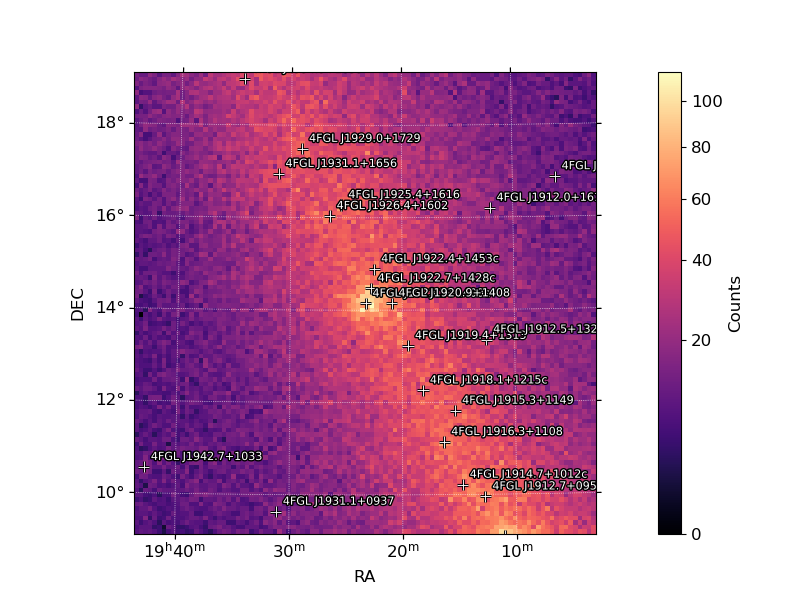

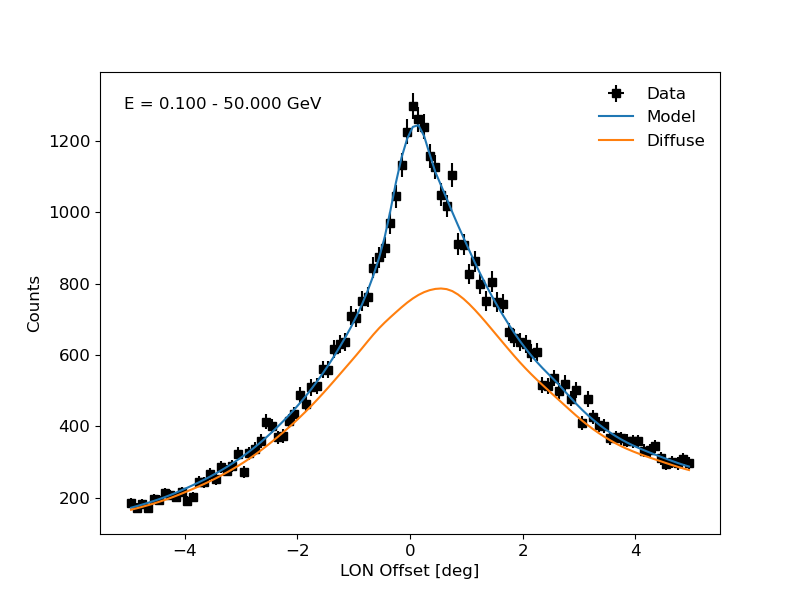

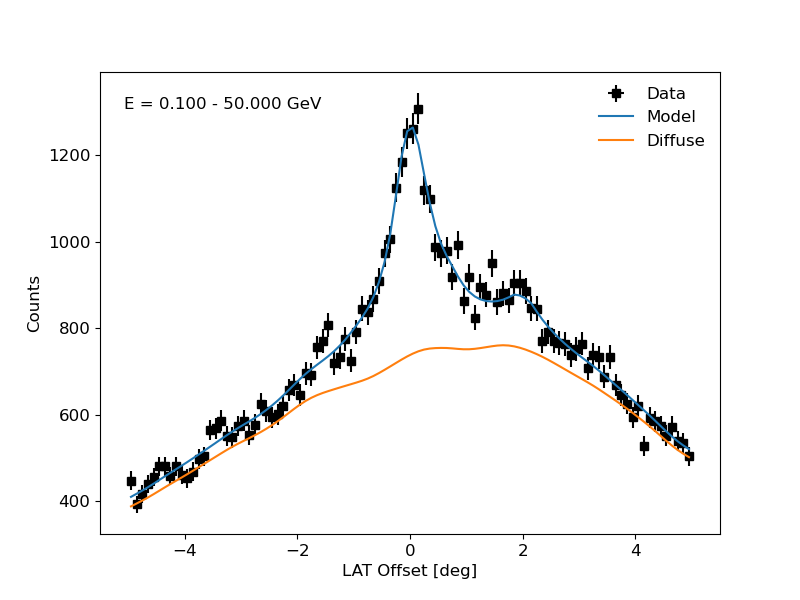

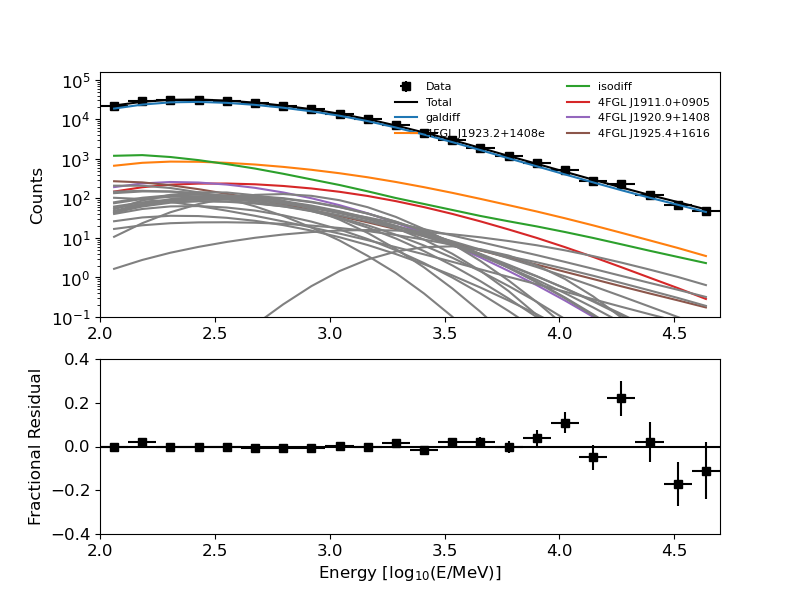

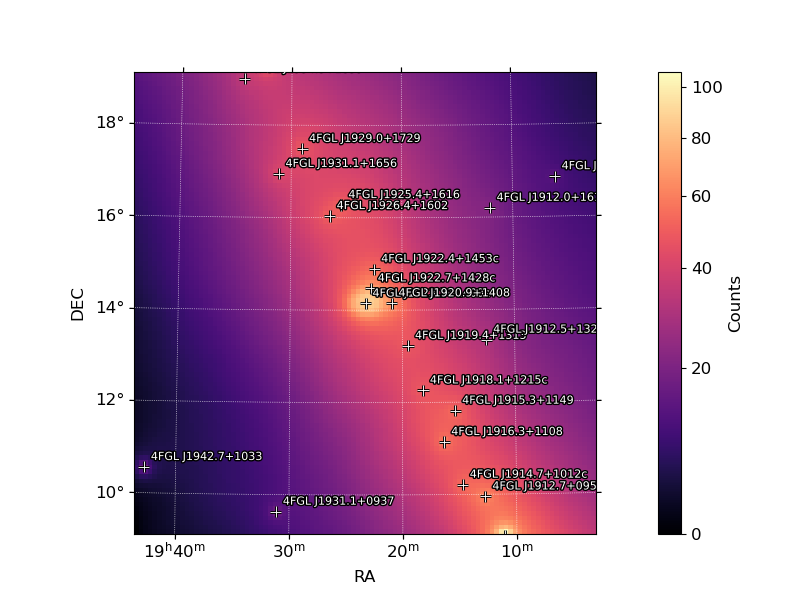

In [64]:
from IPython.display import display, Image
image_names = ['baseline_model_counts_map_2.000_4.699', 'baseline_model_counts_map_xproj_2.000_4.699', 'baseline_model_counts_map_yproj_2.000_4.699',
              'baseline_model_counts_spectrum', 'baseline_model_model_map_2.000_4.699']
for i in image_names:
    display(Image('data/%s.png'%i))

In [65]:
print(gta.roi['4FGL J1923.2+1408e'])

Name           : 4FGL J1923.2+1408e
Associations   : ['4FGL J1923.2+1408e', 'W 51C', '2AGL J1924+1416', 'W 51']
RA/DEC         :    290.818/    14.145
GLON/GLAT      :     49.116/    -0.462
TS             : 2185.60
Npred          : 7499.11
Flux           : 3.028e-07 +/- 2.39e-08
EnergyFlux     : 0.0001902 +/- 8.23e-06
SpatialModel   : SpatialMap
SpectrumType   : LogParabola
Spectral Parameters
b'norm'        :  5.086e-12 +/-  2.143e-13
b'alpha'       :      2.163 +/-    0.03571
b'beta'        :     0.1026 +/-    0.01651
b'Eb'          :       2768 +/-        nan


We need to look at any source emission that is being modeled by this Fermi source, which is in the global source model above as 4FGL J1923.2+1408e. Let's delete this source and move through detecting its source emission and finding a best-fit spatial template. 

In [66]:
gta.delete_source('4FGL J1923.2+1408e')

2024-05-31 19:38:43 INFO    GTAnalysis.delete_source(): Deleting source 4FGL J1923.2+1408e


In [67]:
gta.print_roi()

2024-05-31 19:38:53 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
4FGL J1922.7+1428c  PointSource    LogParabola       0.341     24.86       862.3
4FGL J1920.9+1408   PointSource    LogParabola       0.575     57.14      1755.8
4FGL J1922.4+1453c  PointSource    LogParabola       0.761     12.47       617.8
4FGL J1919.4+1313   PointSource    LogParabola       1.313     19.98       861.5
4FGL J1926.4+1602   PointSource    LogParabola       2.033     35.24      1042.6
4FGL J1925.4+1616   PointSource    PowerLaw          2.181     42.51      1373.3
4FGL J1918.1+1215c  PointSource    LogParabola       2.270     14.44       657.3
4FGL J1912.5+1320   PointSource    LogParabola       2.742      3.53       252.7
4FGL J1915.3+1149   PointSource    LogParabola       3.040     32.42       926.5
4FGL J1931.1+1656   PointSource    LogParabola       3.3

In [68]:
no_snr_baseline_fit = gta.fit(min_fit_quality=3)

2024-05-31 19:39:01 INFO    GTAnalysis.fit(): Starting fit.
/opt/anaconda/envs/fermi/lib/python3.9/site-packages/scipy/interpolate/_fitpack2.py:298: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
2024-05-31 19:39:36 INFO    GTAnalysis.fit(): Fit returned successfully. Quality:   3 Status:   0
2024-05-31 19:39:36 INFO    GTAnalysis.fit(): LogLike:  -378359.458 DeltaLogLike:      572.648 


In [69]:
gta.print_roi()

2024-05-31 19:39:45 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
4FGL J1922.7+1428c  PointSource    LogParabola       0.341   1097.23      5515.8
4FGL J1920.9+1408   PointSource    LogParabola       0.575    244.07      3663.7
4FGL J1922.4+1453c  PointSource    LogParabola       0.761     -0.00         0.0
4FGL J1919.4+1313   PointSource    LogParabola       1.313     23.59       945.5
4FGL J1926.4+1602   PointSource    LogParabola       2.033     31.22       983.7
4FGL J1925.4+1616   PointSource    PowerLaw          2.181     49.65      1504.7
4FGL J1918.1+1215c  PointSource    LogParabola       2.270     13.33       633.8
4FGL J1912.5+1320   PointSource    LogParabola       2.742      1.57       166.3
4FGL J1915.3+1149   PointSource    LogParabola       3.040     27.80       857.2
4FGL J1931.1+1656   PointSource    LogParabola       3.3

In [70]:
no_snr_baseline = gta.write_roi('no_snr_baseline_model.npy',make_plots=True)

2024-05-31 19:40:03 INFO    GTBinnedAnalysis.write_xml(): Writing /data/fermi-summer-school/Advanced_Topics/Extended_Source_Fitting/data/no_snr_baseline_model_00.xml...
2024-05-31 19:40:03 INFO    GTBinnedAnalysis.write_xml(): Writing /data/fermi-summer-school/Advanced_Topics/Extended_Source_Fitting/data/no_snr_baseline_model_01.xml...
2024-05-31 19:40:03 INFO    GTBinnedAnalysis.write_xml(): Writing /data/fermi-summer-school/Advanced_Topics/Extended_Source_Fitting/data/no_snr_baseline_model_02.xml...
2024-05-31 19:40:04 INFO    GTBinnedAnalysis.write_xml(): Writing /data/fermi-summer-school/Advanced_Topics/Extended_Source_Fitting/data/no_snr_baseline_model_03.xml...
2024-05-31 19:40:04 INFO    GTAnalysis.write_fits(): Writing /data/fermi-summer-school/Advanced_Topics/Extended_Source_Fitting/data/no_snr_baseline_model.fits...
2024-05-31 19:40:11 INFO    GTAnalysis.write_roi(): Writing /data/fermi-summer-school/Advanced_Topics/Extended_Source_Fitting/data/no_snr_baseline_model.npy...


In [71]:
ls data/*.png

data/baseline_model_counts_map_2.000_4.699.png
data/baseline_model_counts_map_xproj_2.000_4.699.png
data/baseline_model_counts_map_yproj_2.000_4.699.png
data/baseline_model_counts_spectrum.png
data/baseline_model_model_map_2.000_4.699.png
data/no_snr_baseline_model_counts_map_2.000_4.699.png
data/no_snr_baseline_model_counts_map_xproj_2.000_4.699.png
data/no_snr_baseline_model_counts_map_yproj_2.000_4.699.png
data/no_snr_baseline_model_counts_spectrum.png
data/no_snr_baseline_model_model_map_2.000_4.699.png
data/ps_model_counts_map_2.000_4.699.png
data/ps_model_counts_map_xproj_2.000_4.699.png
data/ps_model_counts_map_yproj_2.000_4.699.png
data/ps_model_counts_spectrum.png
data/ps_model_model_map_2.000_4.699.png


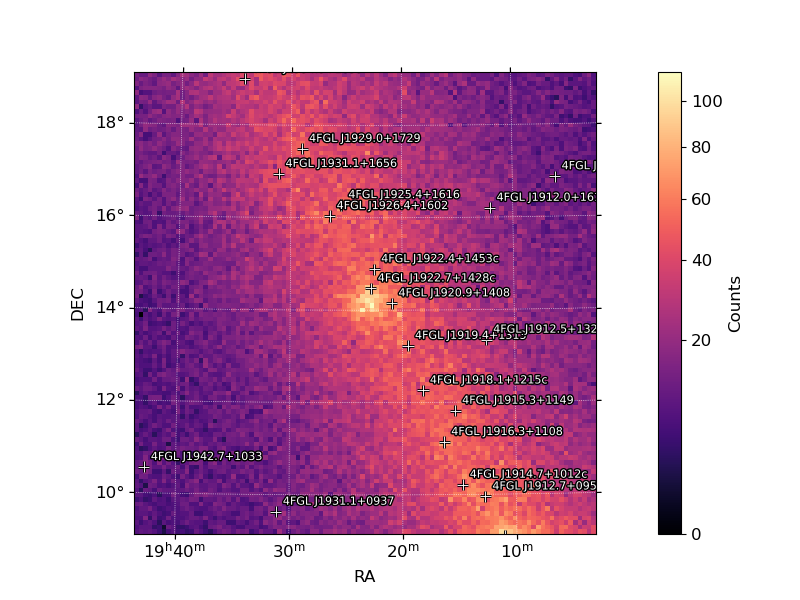

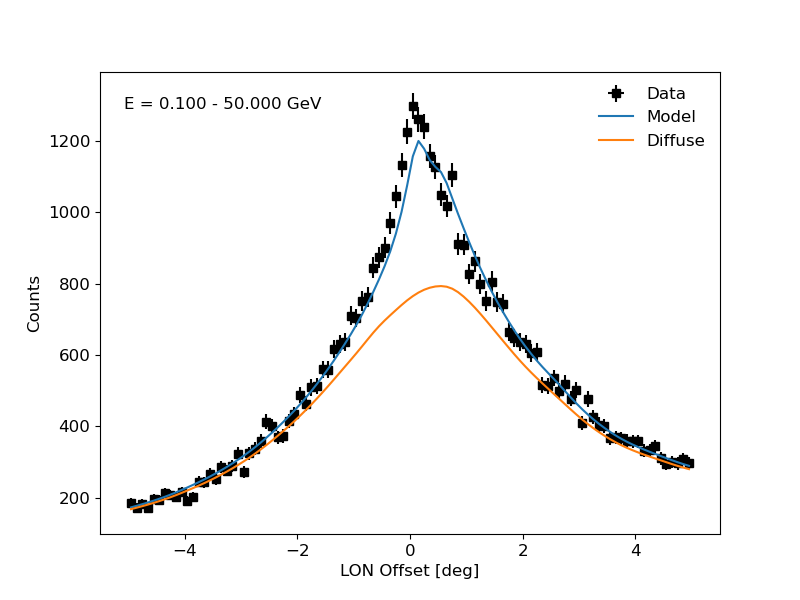

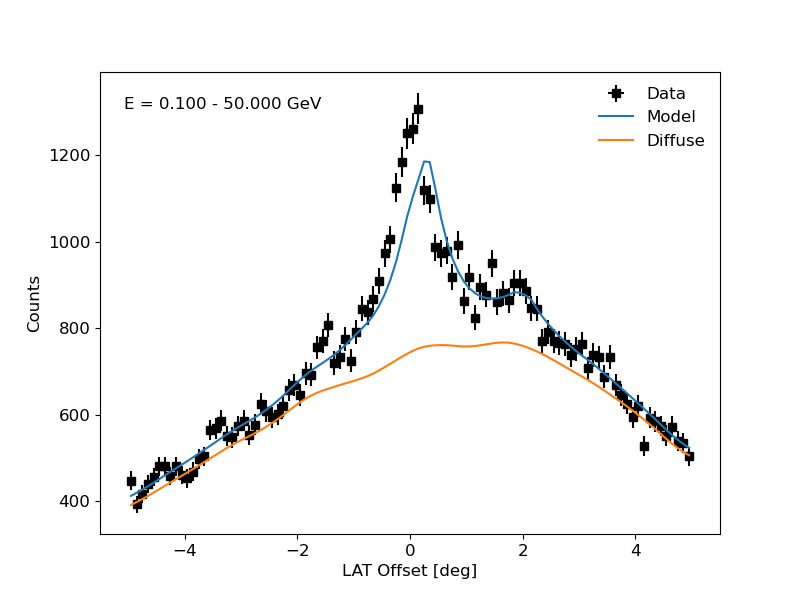

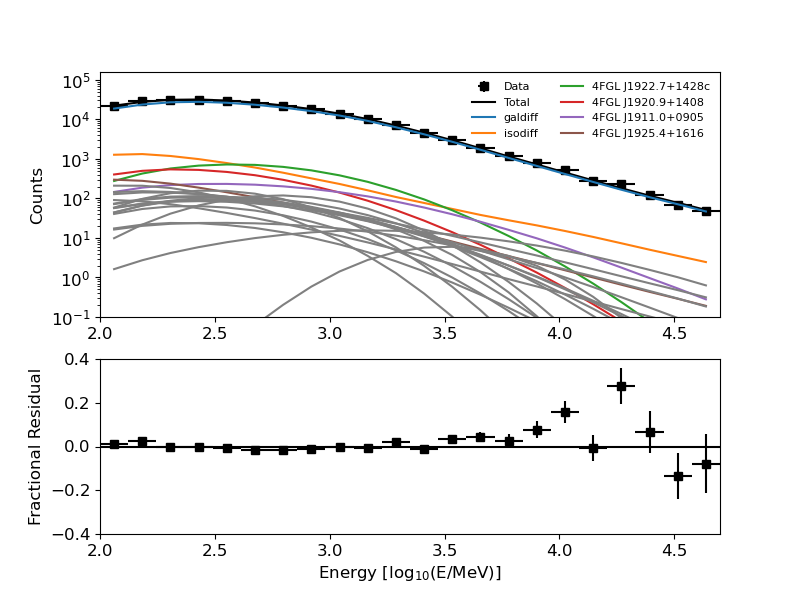

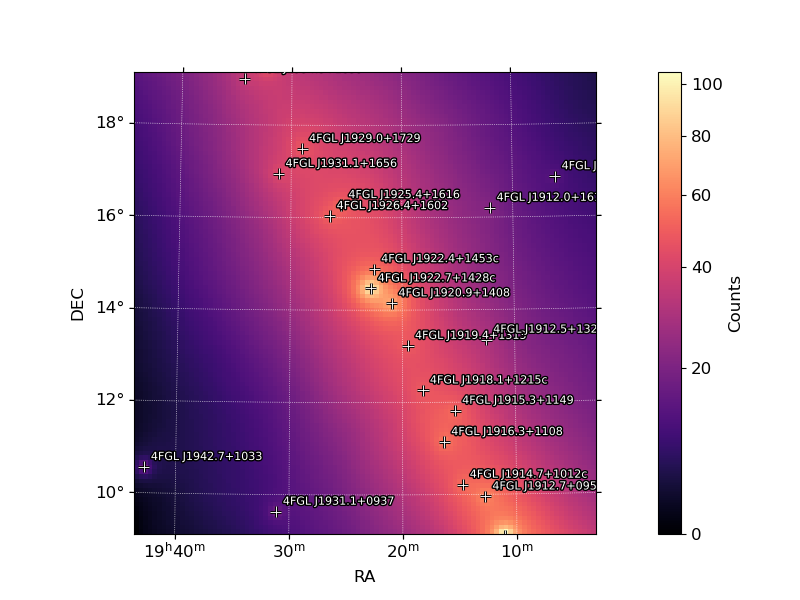

In [72]:
from IPython.display import display, Image
image_names = ['no_snr_baseline_model_counts_map_2.000_4.699', 'no_snr_baseline_model_counts_map_xproj_2.000_4.699', 'no_snr_baseline_model_counts_map_yproj_2.000_4.699',
              'no_snr_baseline_model_counts_spectrum', 'no_snr_baseline_model_model_map_2.000_4.699']
for i in image_names:
    display(Image('data/%s.png'%i))

# Source detection

Let's make a TS map of the global source model above. Any TS values present in the region reflect residual emission not being modeled. Remember, $\sqrt{TS} \propto \sigma$, where $\sigma$ is the detection significance. A TS value of 25 or greater is considered a significant source detection. 

In [73]:
global_ts = gta.tsmap('global_model',model={'SpatialModel' : 'PointSource', 'Index' : 2.0})

2024-05-31 19:41:14 INFO    GTAnalysis.tsmap(): Generating TS map
2024-05-31 19:41:17 INFO    GTAnalysis._make_tsmap_fast(): Fitting test source.
2024-05-31 19:42:08 INFO    GTAnalysis.tsmap(): Finished TS map
2024-05-31 19:42:13 WARNING GTAnalysis.tsmap(): Saving TS maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /data/fermi-summer-school/Advanced_Topics/Extended_Source_Fitting/data/global_model_pointsource_powerlaw_2.00_tsmap.npy
2024-05-31 19:42:13 INFO    GTAnalysis.tsmap(): Execution time: 59.09 s


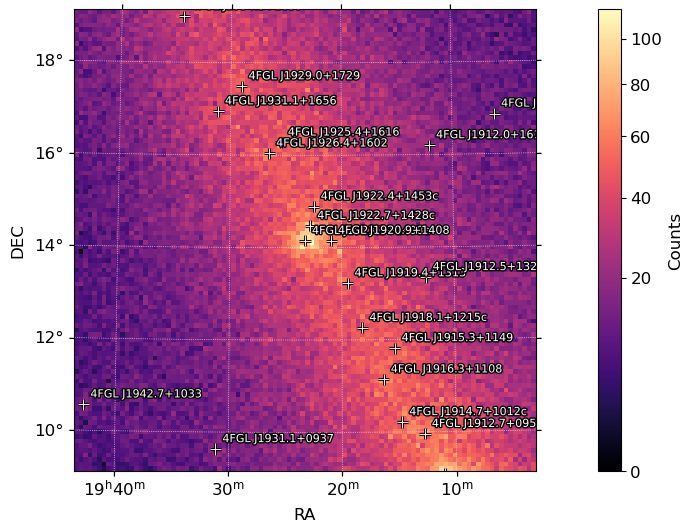

<Figure size 800x600 with 0 Axes>

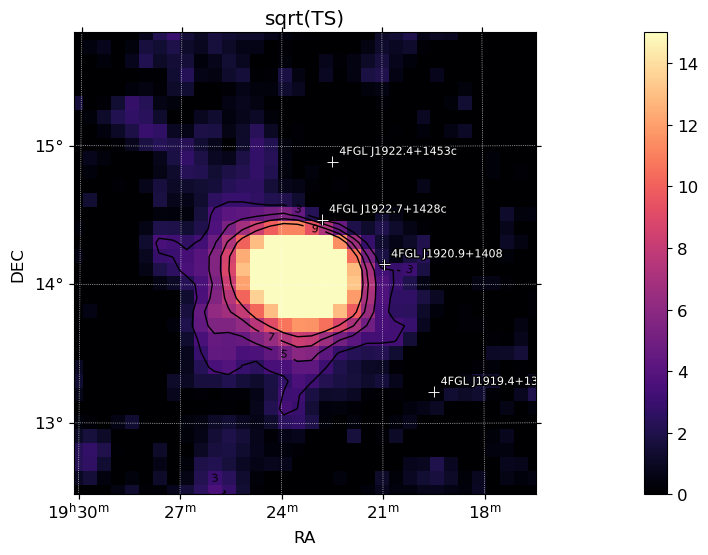

In [74]:
from fermipy.plotting import ROIPlotter
plt.clf()
fig = plt.figure(figsize=(14,6))
ROIPlotter(global_ts['sqrt_ts'],roi=gta.roi).plot(zoom=3,vmin=np.min(global_ts['sqrt_ts']),vmax=15,levels=[3,5,7,9],subplot=111,cmap='magma')
plt.gca().set_title('sqrt(TS)')
plt.show()

There is a clear significant excess that coincides with the source position of W51C $\sqrt{TS} > 14 $.

In order to properly account for this emission in our source model, we begin by placing a point source at the location of the TS peak. 

## Add a point source at peak residual location to the model

In [75]:
gta.add_source('ps',{'ra' : 290.83, 'dec' : 14.1558, 'SpectrumType' : 'PowerLaw', 'Index' : 2.0, 'SpatialModel' : 'PointSource'})

2024-05-31 19:44:11 INFO    GTAnalysis.add_source(): Adding source ps


In [76]:
gta.print_roi()

2024-05-31 19:44:15 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
ps                  PointSource    PowerLaw          0.000       nan       229.2
4FGL J1922.7+1428c  PointSource    LogParabola       0.341   1097.23      5515.8
4FGL J1920.9+1408   PointSource    LogParabola       0.575    244.07      3663.7
4FGL J1922.4+1453c  PointSource    LogParabola       0.761     -0.00         0.0
4FGL J1919.4+1313   PointSource    LogParabola       1.313     23.59       945.5
4FGL J1926.4+1602   PointSource    LogParabola       2.033     31.22       983.7
4FGL J1925.4+1616   PointSource    PowerLaw          2.181     49.65      1504.7
4FGL J1918.1+1215c  PointSource    LogParabola       2.270     13.33       633.8
4FGL J1912.5+1320   PointSource    LogParabola       2.742      1.57       166.3
4FGL J1915.3+1149   PointSource    LogParabola       3.0

In [77]:
gta.free_source('ps')
gta.fit(min_fit_quality=3)

2024-05-31 19:46:28 INFO    GTAnalysis.free_source(): Freeing parameters for ps                    : ['Index']
2024-05-31 19:46:28 INFO    GTAnalysis.fit(): Starting fit.
/opt/anaconda/envs/fermi/lib/python3.9/site-packages/scipy/interpolate/_fitpack2.py:298: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
2024-05-31 19:47:11 INFO    GTAnalysis.fit(): Fit returned successfully. Quality:   3 Status:   0
2024-05-31 19:47:11 INFO    GTAnalysis.fit(): LogLike:  -377853.792 DeltaLogLike:      426.573 


{'fit_quality': 3,
 'fit_status': 0,
 'fit_success': True,
 'dloglike': 426.57307889626827,
 'edm': 0.00012874144948691368,
 'loglike': -377853.7917044299,
 'covariance': array([[ 1.12710493e-01, -2.75198776e-05, -2.57672623e-04,
          3.82098155e-05,  7.13490458e-06,  1.09920321e-04,
         -5.49509625e-05, -1.81534169e-04,  1.28655753e-04,
         -3.04299877e-05, -4.93663911e-05,  1.21313515e-04,
         -1.44332152e-04,  8.25888034e-05, -2.43554783e-05,
          2.68420154e-04, -4.09770433e-05, -1.12027539e-06,
          5.61351152e-05, -6.36933898e-07,  3.28225125e-05,
         -1.03943502e-03, -2.15143546e-04, -2.99745654e-05],
        [-2.75198776e-05,  5.39810443e-03,  1.36340514e-03,
          1.14235034e-03, -2.06100032e-03, -7.78534297e-04,
          9.28322348e-05,  1.80935648e-03, -8.98012187e-04,
          2.89688221e-04,  8.56345326e-04,  4.62934775e-05,
          7.33535517e-04,  1.28543392e-03,  1.07967291e-03,
         -6.09599320e-06, -9.85319737e-04,  3.369

In [78]:
print(gta.roi['ps'])

Name           : ps
Associations   : ['ps']
RA/DEC         :    290.830/    14.156
GLON/GLAT      :     49.131/    -0.467
TS             : 1565.63
Npred          : 6777.41
Flux           : 3.056e-07 +/- 1.98e-08
EnergyFlux     : 0.0001613 +/- 6.98e-06
SpatialModel   : PointSource
SpectrumType   : PowerLaw
Spectral Parameters
b'Prefactor'   :  2.742e-11 +/-  1.223e-12
b'Index'       :     -2.082 +/-    0.02669
b'Scale'       :       1000 +/-        nan


In [79]:
ps = gta.write_roi('ps_model.npy',make_plots=True)

2024-05-31 19:47:47 INFO    GTBinnedAnalysis.write_xml(): Writing /data/fermi-summer-school/Advanced_Topics/Extended_Source_Fitting/data/ps_model_00.xml...
2024-05-31 19:47:47 INFO    GTBinnedAnalysis.write_xml(): Writing /data/fermi-summer-school/Advanced_Topics/Extended_Source_Fitting/data/ps_model_01.xml...
2024-05-31 19:47:47 INFO    GTBinnedAnalysis.write_xml(): Writing /data/fermi-summer-school/Advanced_Topics/Extended_Source_Fitting/data/ps_model_02.xml...
2024-05-31 19:47:47 INFO    GTBinnedAnalysis.write_xml(): Writing /data/fermi-summer-school/Advanced_Topics/Extended_Source_Fitting/data/ps_model_03.xml...
2024-05-31 19:47:47 INFO    GTAnalysis.write_fits(): Writing /data/fermi-summer-school/Advanced_Topics/Extended_Source_Fitting/data/ps_model.fits...
2024-05-31 19:47:55 INFO    GTAnalysis.write_roi(): Writing /data/fermi-summer-school/Advanced_Topics/Extended_Source_Fitting/data/ps_model.npy...


The point source is clearly a significant source, with a TS value = 1565. Let's make a TS map of the new global source model including this source to see if there remains any significant residual emission.

In [80]:
ps_ts = gta.tsmap('ps_model',model={'SpatialModel' : 'PointSource', 'Index' : 2.0})

2024-05-31 19:48:05 INFO    GTAnalysis.tsmap(): Generating TS map
2024-05-31 19:48:08 INFO    GTAnalysis._make_tsmap_fast(): Fitting test source.
2024-05-31 19:48:58 INFO    GTAnalysis.tsmap(): Finished TS map
2024-05-31 19:49:03 WARNING GTAnalysis.tsmap(): Saving TS maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /data/fermi-summer-school/Advanced_Topics/Extended_Source_Fitting/data/ps_model_pointsource_powerlaw_2.00_tsmap.npy
2024-05-31 19:49:03 INFO    GTAnalysis.tsmap(): Execution time: 58.76 s


<Figure size 800x600 with 0 Axes>

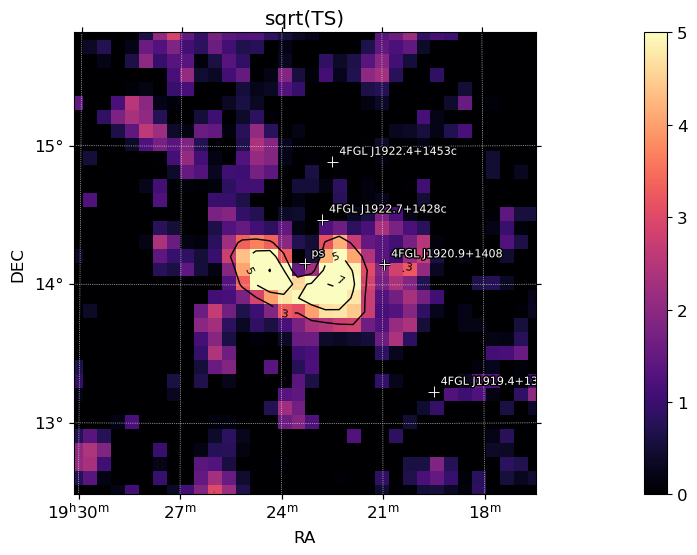

In [81]:
from fermipy.plotting import ROIPlotter
plt.clf()
fig = plt.figure(figsize=(14,6))
ROIPlotter(ps_ts['sqrt_ts'],roi=gta.roi).plot(zoom=3,vmin=np.min(ps_ts['sqrt_ts']),vmax=5,levels=[3,5,7,9],subplot=111,cmap='magma')
plt.gca().set_title('sqrt(TS)')
plt.show()

Clearly there remains some significant excess in the immediate region the point source is not characterizing. Let's run some extension tests to see if there is a better spatial template. We take advantage of some of the extension options, too, like letting the position vary.

## Extension fitting

In [82]:
rd = gta.extension('ps',fit_position=True,spatial_model='RadialDisk')

2024-05-31 19:50:56 INFO    GTAnalysis.extension(): Running extension fit for ps
2024-05-31 19:51:36 INFO    GTAnalysis._fit_extension_full(): Iter 0 R68 =    0.230 Offset =    0.033 LogLikelihood = -377746.83 Delta-LogLikelihood =   106.97
2024-05-31 19:52:16 INFO    GTAnalysis._fit_extension_full(): Iter 1 R68 =    0.226 Offset =    0.033 LogLikelihood = -377746.73 Delta-LogLikelihood =     0.09
2024-05-31 19:52:16 INFO    GTAnalysis._extension(): Fitting extended-source model.
2024-05-31 19:52:26 INFO    GTAnalysis._extension(): Generating TS map.
2024-05-31 19:52:30 INFO    GTAnalysis._extension(): Testing point-source model.
2024-05-31 19:52:30 INFO    GTAnalysis.localize(): Running localization for ps
2024-05-31 19:52:45 INFO    GTAnalysis._localize(): Localization succeeded.
2024-05-31 19:52:45 INFO    GTAnalysis._localize(): Localization completed with new position:
(  ra, dec) = (  290.7998 +/-   0.0094,   14.1232 +/-   0.0085)
(glon,glat) = (   49.0882 +/-   0.0086,   -0.4563

{'spatial_model': 'RadialDisk', 'width': [], 'fit_position': True, 'width_min': 0.01, 'width_max': 1.0, 'width_nstep': 21, 'free_background': False, 'fix_shape': False, 'free_radius': None, 'fit_ebin': False, 'update': False, 'save_model_map': False, 'sqrt_ts_threshold': None, 'psf_scale_fn': None, 'make_tsmap': True, 'tsmap_fitter': 'tsmap', 'make_plots': False, 'write_fits': True, 'write_npy': True, 'reoptimize': False, 'optimizer': {'optimizer': 'MINUIT', 'tol': 0.001, 'max_iter': 100, 'init_lambda': 0.0001, 'retries': 3, 'min_fit_quality': 2, 'verbosity': 0}, 'prefix': '', 'outfile': None, 'loge_bins': []}
{'spatial_model': 'RadialDisk', 'width': [], 'fit_position': True, 'width_min': 0.01, 'width_max': 1.0, 'width_nstep': 21, 'free_background': False, 'fix_shape': False, 'free_radius': None, 'fit_ebin': False, 'update': False, 'save_model_map': False, 'sqrt_ts_threshold': None, 'psf_scale_fn': None, 'make_tsmap': True, 'tsmap_fitter': 'tsmap', 'make_plots': False, 'write_fits': Tr

2024-05-31 19:52:54 WARNING GTAnalysis.extension(): Saving maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /data/fermi-summer-school/Advanced_Topics/Extended_Source_Fitting/data/ps_ext.npy
2024-05-31 19:52:54 INFO    GTAnalysis.extension(): Execution time: 118.02 s


{'name': 'ps', 'file': None, 'config': {'spatial_model': 'RadialDisk', 'width': [], 'fit_position': True, 'width_min': 0.01, 'width_max': 1.0, 'width_nstep': 21, 'free_background': False, 'fix_shape': False, 'free_radius': None, 'fit_ebin': False, 'update': False, 'save_model_map': False, 'sqrt_ts_threshold': None, 'psf_scale_fn': None, 'make_tsmap': True, 'tsmap_fitter': 'tsmap', 'make_plots': False, 'write_fits': True, 'write_npy': True, 'reoptimize': False, 'optimizer': {'optimizer': 'MINUIT', 'tol': 0.001, 'max_iter': 100, 'init_lambda': 0.0001, 'retries': 3, 'min_fit_quality': 2, 'verbosity': 0}, 'prefix': '', 'outfile': None, 'loge_bins': []}, 'width': array([0.        , 0.01      , 0.01258925, 0.01584893, 0.01995262,
       0.02511886, 0.03162278, 0.03981072, 0.05011872, 0.06309573,
       0.07943282, 0.1       , 0.12589254, 0.15848932, 0.19952623,
       0.25118864, 0.31622777, 0.39810717, 0.50118723, 0.63095734,
       0.79432823, 1.        ]), 'dloglike': array([  -2.75448853

In [83]:
rg = gta.extension('ps',fit_position=True,spatial_model='RadialGaussian')

2024-05-31 19:52:54 INFO    GTAnalysis.extension(): Running extension fit for ps
2024-05-31 19:53:35 INFO    GTAnalysis._fit_extension_full(): Iter 0 R68 =    0.222 Offset =    0.035 LogLikelihood = -377746.43 Delta-LogLikelihood =   107.36
2024-05-31 19:54:16 INFO    GTAnalysis._fit_extension_full(): Iter 1 R68 =    0.216 Offset =    0.036 LogLikelihood = -377746.33 Delta-LogLikelihood =     0.09
2024-05-31 19:54:16 INFO    GTAnalysis._extension(): Fitting extended-source model.
2024-05-31 19:54:27 INFO    GTAnalysis._extension(): Generating TS map.
2024-05-31 19:54:31 INFO    GTAnalysis._extension(): Testing point-source model.
2024-05-31 19:54:32 INFO    GTAnalysis.localize(): Running localization for ps
2024-05-31 19:54:45 INFO    GTAnalysis._localize(): Localization succeeded.
2024-05-31 19:54:45 INFO    GTAnalysis._localize(): Localization completed with new position:
(  ra, dec) = (  290.7998 +/-   0.0094,   14.1232 +/-   0.0085)
(glon,glat) = (   49.0883 +/-   0.0087,   -0.4563

{'spatial_model': 'RadialGaussian', 'width': [], 'fit_position': True, 'width_min': 0.01, 'width_max': 1.0, 'width_nstep': 21, 'free_background': False, 'fix_shape': False, 'free_radius': None, 'fit_ebin': False, 'update': False, 'save_model_map': False, 'sqrt_ts_threshold': None, 'psf_scale_fn': None, 'make_tsmap': True, 'tsmap_fitter': 'tsmap', 'make_plots': False, 'write_fits': True, 'write_npy': True, 'reoptimize': False, 'optimizer': {'optimizer': 'MINUIT', 'tol': 0.001, 'max_iter': 100, 'init_lambda': 0.0001, 'retries': 3, 'min_fit_quality': 2, 'verbosity': 0}, 'prefix': '', 'outfile': None, 'loge_bins': []}
{'spatial_model': 'RadialGaussian', 'width': [], 'fit_position': True, 'width_min': 0.01, 'width_max': 1.0, 'width_nstep': 21, 'free_background': False, 'fix_shape': False, 'free_radius': None, 'fit_ebin': False, 'update': False, 'save_model_map': False, 'sqrt_ts_threshold': None, 'psf_scale_fn': None, 'make_tsmap': True, 'tsmap_fitter': 'tsmap', 'make_plots': False, 'write_f

2024-05-31 19:54:55 WARNING GTAnalysis.extension(): Saving maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /data/fermi-summer-school/Advanced_Topics/Extended_Source_Fitting/data/ps_ext.npy
2024-05-31 19:54:55 INFO    GTAnalysis.extension(): Execution time: 120.96 s


{'name': 'ps', 'file': None, 'config': {'spatial_model': 'RadialGaussian', 'width': [], 'fit_position': True, 'width_min': 0.01, 'width_max': 1.0, 'width_nstep': 21, 'free_background': False, 'fix_shape': False, 'free_radius': None, 'fit_ebin': False, 'update': False, 'save_model_map': False, 'sqrt_ts_threshold': None, 'psf_scale_fn': None, 'make_tsmap': True, 'tsmap_fitter': 'tsmap', 'make_plots': False, 'write_fits': True, 'write_npy': True, 'reoptimize': False, 'optimizer': {'optimizer': 'MINUIT', 'tol': 0.001, 'max_iter': 100, 'init_lambda': 0.0001, 'retries': 3, 'min_fit_quality': 2, 'verbosity': 0}, 'prefix': '', 'outfile': None, 'loge_bins': []}, 'width': array([0.        , 0.01      , 0.01258925, 0.01584893, 0.01995262,
       0.02511886, 0.03162278, 0.03981072, 0.05011872, 0.06309573,
       0.07943282, 0.1       , 0.12589254, 0.15848932, 0.19952623,
       0.25118864, 0.31622777, 0.39810717, 0.50118723, 0.63095734,
       0.79432823, 1.        ]), 'dloglike': array([-1.544469

In [84]:
print('LogLikelihood :', rd['loglike_ext'])
print('TS_ext :', rd['ts_ext'])
print('RA,Dec J2000 in deg :', rd['ra'],rd['dec'])
print('Best-fit extension in deg :', rd['ext'])
print('Error on extension in deg :', rd['ext_err'])
print('95% upper limit on extension in deg :', rd['ext_ul95'])

LogLikelihood : -377746.7328795616
TS_ext : 189.39685984142125
RA,Dec J2000 in deg : 290.8211312322335 14.123834888446751
Best-fit extension in deg : 0.22622607266037706
Error on extension in deg : 0.009955876520431589
95% upper limit on extension in deg : 0.24260201507893156


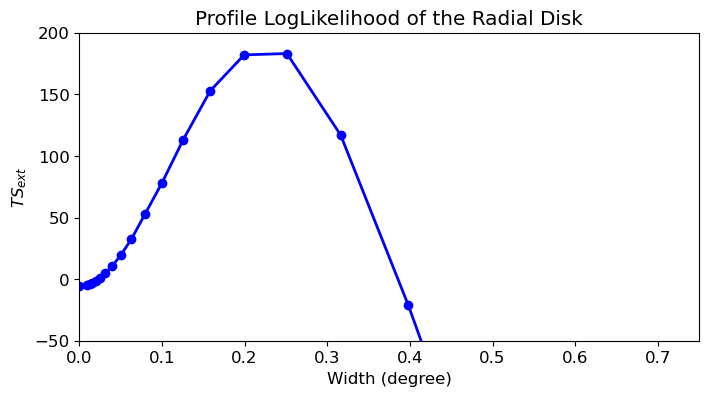

In [85]:
plt.figure(figsize=(8,4))
width = rd['width']
ts_ext = 2*rd['dloglike']
plt.ylim(-50,200)
plt.xlim(0,0.75)
plt.plot(width,ts_ext,marker='o',color='blue',lw=2,label=r'$TS_{ext}$')
plt.title('Profile LogLikelihood of the Radial Disk')
plt.ylabel(r'$TS_{ext}$')
plt.xlabel(r'Width (degree)')
plt.show()

We can see from above that the best-fit extension found for the source is 0.23 deg +/- 0.01, with TS_ext = 190. 

In [86]:
print('LogLikelihood :', rg['loglike_ext'])
print('TS_ext :', rg['ts_ext'])
print('RA,Dec J2000 in deg :', rg['ra'],rg['dec'])
print('Best-fit extension in deg :', rg['ext'])
print('Error on extension in deg :', rg['ext_err'])
print('95% upper limit on extension in deg :', rg['ext_ul95'])

LogLikelihood : -377746.334741038
TS_ext : 190.1931368734222
RA,Dec J2000 in deg : 290.81508749817726 14.123253346116124
Best-fit extension in deg : 0.21582300489896172
Error on extension in deg : 0.012306997223382632
95% upper limit on extension in deg : 0.23704930455700016


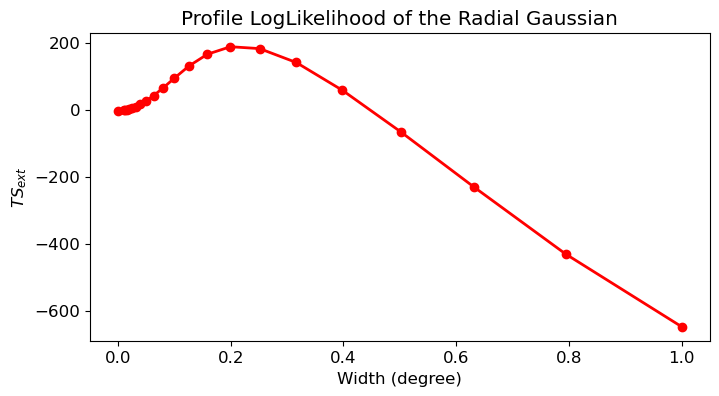

In [87]:
plt.figure(figsize=(8,4))
width = rg['width']
ts_ext = 2*rg['dloglike']
plt.plot(width,ts_ext,marker='o',color='red',lw=2,label=r'$TS_{ext}$')
plt.title('Profile LogLikelihood of the Radial Gaussian')
plt.ylabel(r'$TS_{ext}$')
plt.xlabel(r'Width (degree)')
plt.show()

## Custom spatial templates

Sometimes the radial disk or gaussian templates offered by Fermi are too simple to adequately model extended source emission. Sometimes you need to test a custom spatial template. To do so, one actually has to **make** their own spatial template, which is not trivial. We will not do that here, but you can explore the ways in which we make custom spatial templates [here](https://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/extended/extended.html).

One option would be to take the source shape and size directly from a real observation in another wavelength (radio, X-ray, TeV, etc). 

We will simply look at the Spatial Template that is used for W51C to get a feel for this. To do so, we must read in the baseline model we first created that includes W51C original source. 

In [88]:
gta = GTAnalysis.create('data/baseline_model.npy')

2024-05-31 20:04:36 INFO    GTAnalysis.__init__(): 
--------------------------------------------------------------------------------
fermipy version 1.2.0 
ScienceTools version 2.2.11
2024-05-31 20:04:37 INFO    GTAnalysis.setup(): Running setup.
2024-05-31 20:04:37 INFO    GTBinnedAnalysis.setup(): Running setup for component 00
2024-05-31 20:04:37 INFO    GTBinnedAnalysis._select_data(): Skipping data selection.
2024-05-31 20:04:37 INFO    GTBinnedAnalysis._create_ltcube(): Skipping LT Cube.
2024-05-31 20:04:37 INFO    GTBinnedAnalysis._create_expcube(): Skipping gtexpcube.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-OBS to 54682.655283 from DATE-OBS.
Set MJD-END to 55026.000000 from DATE-END'. [astropy.wcs.wcs]
2024-05-31 20:04:37 INFO    GTBinnedAnalysis._create_srcmaps(): Skipping gtsrcmaps.
2024-05-31 20:04:37 INFO    GTBinnedAnalysis.setup(): Finished setup for component 00
2024-05-31 20:04:37 INFO    GTBinnedAnalysis.setup(): Running setup for co

In [91]:
gta.print_roi()

2024-05-31 20:07:23 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
4FGL J1923.2+1408e  SpatialMap     LogParabola       0.016   2185.60      7499.1
4FGL J1922.7+1428c  PointSource    LogParabola       0.341     24.86       862.3
4FGL J1920.9+1408   PointSource    LogParabola       0.575     57.14      1755.8
4FGL J1922.4+1453c  PointSource    LogParabola       0.761     12.47       617.8
4FGL J1919.4+1313   PointSource    LogParabola       1.313     19.98       861.5
4FGL J1926.4+1602   PointSource    LogParabola       2.033     35.24      1042.6
4FGL J1925.4+1616   PointSource    PowerLaw          2.181     42.51      1373.3
4FGL J1918.1+1215c  PointSource    LogParabola       2.270     14.44       657.3
4FGL J1912.5+1320   PointSource    LogParabola       2.742      3.53       252.7
4FGL J1915.3+1149   PointSource    LogParabola       3.0

In [92]:
print(gta.roi['4FGL J1923.2+1408e'])

Name           : 4FGL J1923.2+1408e
Associations   : ['4FGL J1923.2+1408e', 'W 51C', '2AGL J1924+1416', 'W 51']
RA/DEC         :    290.818/    14.145
GLON/GLAT      :     49.116/    -0.462
TS             : 2185.60
Npred          : 7499.11
Flux           : 3.028e-07 +/- 2.39e-08
EnergyFlux     : 0.0001902 +/- 8.23e-06
SpatialModel   : SpatialMap
SpectrumType   : LogParabola
Spectral Parameters
b'norm'        :  5.086e-12 +/-  2.143e-13
b'alpha'       :      2.163 +/-    0.03571
b'beta'        :     0.1026 +/-    0.01651
b'Eb'          :       2768 +/-        nan


In [93]:
print(gta.roi['4FGL J1923.2+1408e']['Spatial_Filename'])

$FERMIPY_DATA_DIR/catalogs/Extended_12years/Templates/W51C.fits


In [94]:
!ls /opt/anaconda/envs/fermi/lib/python3.9/site-packages/fermipy/data/catalogs/Extended_12years/Templates

CenALobes.fits	    LMC-30DorWest.fits	   RCW86.fits		     W3.fits
CygnusLoop.fits     LMC-FarWest.fits	   Rosette.fits		     W44.fits
FornaxA.fits	    LMC-Galaxy.fits	   RXJ1713_2016_250GeV.fits  W51C.fits
G279.0+1.1.fits     LMC-North.fits	   S147.fits
HB9.fits	    MSH15-56_PWN.fits	   SMC-Galaxy.fits
HESSJ1841-055.fits  MSH15-56_SNRmask.fits  VelaX_radio.fits


### The elliptical Gaussian spatial template for W51C

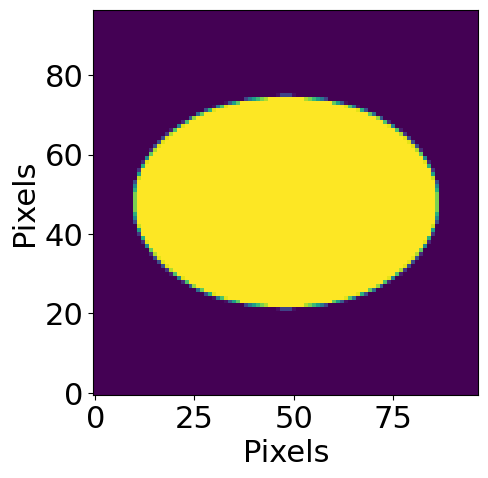

In [95]:
from astropy.io import fits as pyfits
from matplotlib import rc
import matplotlib.pyplot as plt
rc('font', **{'size'   : 22})
#from IPython.display import Image
#display(Image('W51C.png',width=400))
hdu = pyfits.open('/opt/anaconda/envs/fermi/lib/python3.9/site-packages/fermipy/data/catalogs/Extended_12years/Templates/W51C.fits')
fig = plt.figure(figsize=(5,5))
plt.imshow(hdu[0].data,origin='lower')
plt.xlabel('Pixels')
plt.ylabel('Pixels')
plt.show()

# Recap

Remember we saved our baseline model loglike value in the ```baseline_fit``` up above. We can also compare the properties found for the ```radial disk / radial gaussian``` to the properties of ```4FGL J1923.2+1408e``` up above.

In [96]:
print('LogLike of 4FGL J1923.2+1408e:', baseline_fit['loglike']) 
print('LogLike of radial disk:', rd['loglike_ext'])
print('LogLike of radial Gaussian:', rg['loglike_ext'])

LogLike of 4FGL J1923.2+1408e: -377724.95450445794
LogLike of radial disk: -377746.7328795616
LogLike of radial Gaussian: -377746.334741038


For more information, see the published report: [Detection of W51C with Fermi](https://ui.adsabs.harvard.edu/abs/2009ApJ...706L...1A/abstract)